# Fannie Mae credit risk analysis - using distributed computing (Spark/PySpark on AWS's S3 server)

## Set up Spark/PySpark environment

In [3]:
# run this when in JupyterHub

import os, sys
print(sys.version_info)
# make sure pyspark tells workers to use python3 not 2 if both are installed
os.environ['PYSPARK_PYTHON'] = '/usr/bin/python3'
os.environ['PYSPARK_DRIVER_PYTHON'] = '/usr/bin/python3'
os.getcwd()

sys.version_info(major=3, minor=6, micro=0, releaselevel='final', serial=0)


'/Users/Emma/Desktop'

In [4]:
#create Spark context and import libraries (including time)

from pyspark import SparkContext
sc = SparkContext.getOrCreate()
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType, TimestampType
from pyspark.sql import SparkSession
import pandas as pd
sqlContext = SparkSession.builder.getOrCreate()

import matplotlib.pyplot as plt
%matplotlib inline


import time


## Load Fannie Mae data

In [5]:
#define the data schema for the datafiles

acquisition_schema = StructType([
    StructField("loan_identifier", StringType(), False),
    StructField("channel", StringType(), True),
    StructField("seller_name", StringType(), True),
    StructField("original_interest_rate", DoubleType(), True),
    StructField("original_unpaid_principal_balance", DoubleType(), True),
    StructField("original_loan_term", IntegerType(), True),
    StructField("origination_date", DateType(), True),
    StructField("first_payment_date", DateType(), True),
    StructField("original_ltv", DoubleType(), True),
    StructField("original_cltv", DoubleType(), True),
    StructField("number_of_borrowers", IntegerType(), True),
    StructField("dti", DoubleType(), True),
    StructField("borrower_credit_score", IntegerType(), True),
    StructField("first_time_homebuyer", StringType(), True),
    StructField("loan_purpose", StringType(), True),
    StructField("property_type", StringType(), True),
    StructField("number_of_units", StringType(), True),
    StructField("occupancy_status", StringType(), True),
    StructField("property_state", StringType(), True),
    StructField("zip_code", StringType(), True),
    StructField("mortgage_insurance_pct", DoubleType(), True),
    StructField("product_type", StringType(), True),
    StructField("coborrower_credit_score", IntegerType(), True)
])

performance_schema = StructType([
    StructField("loan_identifier", StringType(), False),
    StructField("monthly_reporting_period", StringType(), True),
    StructField("servicer_name", StringType(), True),
    StructField("current_interest_rate", DoubleType(), True),
    StructField("current_actual_unpaid_principal_balance", DoubleType(), True),
    StructField("loan_age", IntegerType(), True),
    StructField("remaining_months_to_legal_maturity", IntegerType(), True),
    StructField("adjusted_remaining_months_to_matruity", IntegerType(), True),
    StructField("maturity_date", StringType(), True),
    StructField("metropolitan_statistical_area", StringType(), True),
    StructField("current_loan_delinquency_status", StringType(), True),
    StructField("modification_flag", StringType(), True),
    StructField("zero_balance_code", StringType(), True),
    StructField("zero_balance_effective_date", StringType(), True),
    StructField("last_paid_installment_date", StringType(), True),
    StructField("foreclosure_date", StringType(), True),
    StructField("disposition_date", StringType(), True),
    StructField("foreclosure_costs", DoubleType(), True),
    StructField("property_preservation_and_repair_costs", DoubleType(), True),
    StructField("asset_recovery_costs", DoubleType(), True),
    StructField("miscellaneous_holding_expenses_and_credits", DoubleType(), True),
    StructField("associated_taxes_for_holding_property", DoubleType(), True),
    StructField("net_sale_proceeds", DoubleType(), True),
    StructField("credit_enhancement_proceeds", DoubleType(), True),
    StructField("repurchase_make_whole_proceeds", DoubleType(), True),
    StructField("other_foreclosure_proceeds", DoubleType(), True),
    StructField("non_interest_bearing_upb", DoubleType(), True),
    StructField("principal_forgiveness_upb", DoubleType(), True)
])

In [6]:
#Read files into pyspark sql dataframes

readintime_start=time.time()

datafile1="s3n://10x-ju-spark-test2/Dataset/Acquisition*.txt"
datafile2="s3n://10x-ju-spark-test2/Dataset/Performance*.txt"

acqu=sqlContext.read.format('com.databricks.spark.csv')\
.options(delimiter="|")\
.option('dateFormat', 'MM/yyyy') \
.schema(acquisition_schema) \
.load(datafile1)

perf=sqlContext.read.format('com.databricks.spark.csv')\
.options(delimiter="|")\
.option('dateFormat', 'MM/yyyy') \
.schema(performance_schema) \
.load(datafile2)

readintime_end=time.time()

elapsed=readintime_end-readintime_start

print("elapsed time for read in is "+str(elapsed))

Py4JJavaError: An error occurred while calling o26.load.
: java.io.IOException: No FileSystem for scheme: s3n
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:2660)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:2667)
	at org.apache.hadoop.fs.FileSystem.access$200(FileSystem.java:94)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:2703)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:2685)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:373)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:295)
	at org.apache.spark.sql.execution.datasources.DataSource$$anonfun$14.apply(DataSource.scala:372)
	at org.apache.spark.sql.execution.datasources.DataSource$$anonfun$14.apply(DataSource.scala:370)
	at scala.collection.TraversableLike$$anonfun$flatMap$1.apply(TraversableLike.scala:241)
	at scala.collection.TraversableLike$$anonfun$flatMap$1.apply(TraversableLike.scala:241)
	at scala.collection.immutable.List.foreach(List.scala:381)
	at scala.collection.TraversableLike$class.flatMap(TraversableLike.scala:241)
	at scala.collection.immutable.List.flatMap(List.scala:344)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:370)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:152)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:135)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)


In [17]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
#count number of rows in each file
a=acqu.count()
p=perf.count()

print("number of borrowers: "+locale.format("%d", a, grouping=True))
print("number of payments: "+locale.format("%d", p, grouping=True))

number of borrowers: 1,022,411
number of payments: 28,602,829


In [20]:
acqu.select('borrower_credit_score').take(10)

[Row(borrower_credit_score=763),
 Row(borrower_credit_score=750),
 Row(borrower_credit_score=686),
 Row(borrower_credit_score=706),
 Row(borrower_credit_score=737),
 Row(borrower_credit_score=793),
 Row(borrower_credit_score=750),
 Row(borrower_credit_score=646),
 Row(borrower_credit_score=676),
 Row(borrower_credit_score=781)]

## Borrower credit score

In [22]:
borrower_credit = acqu.groupby('borrower_credit_score').count().toPandas()
borrower_credit.head(30)

,borrower_credit_score,count
0,496.0,11
1,833.0,10
2,471.0,3
3,463.0,4
4,737.0,6849
5,623.0,2141
6,540.0,105
7,516.0,31
8,808.0,954
9,580.0,472


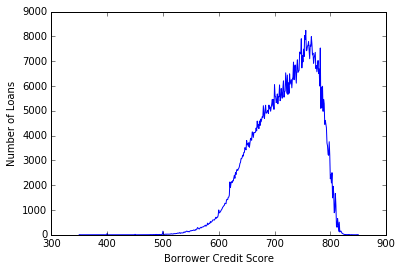

In [23]:
bc_sort = borrower_credit.sort_values(by='borrower_credit_score')
plt.figure()
plt.plot(bc_sort['borrower_credit_score'], bc_sort['count'])
plt.xlabel('Borrower Credit Score')
plt.ylabel('Number of Loans')

## Loan aging analysis

In [24]:
# to get the most recent times for any given loan, we aggregate across loan identifier and accumulate over the maximum
# reporting period
most_recent_months = perf.groupby("loan_identifier").agg({"monthly_reporting_period":"max"})\
    .withColumnRenamed("max(monthly_reporting_period)", "last_monthly_reporting_period")

In [25]:
# interestingly, "left-semi" join is a join where we execute the join on the given keys, but keep only the left side
# of the join if the join succeeds. It turns a join statement into a filter statement.
performance_with_recent = perf.join(most_recent_months, 
                                           how='leftsemi', 
                                           on=(most_recent_months.loan_identifier == perf.loan_identifier) &
                                              (most_recent_months.last_monthly_reporting_period==perf.monthly_reporting_period))

In [27]:
performance_with_recent.toPandas().head()

,loan_identifier,monthly_reporting_period,servicer_name,current_interest_rate,current_actual_unpaid_principal_balance,loan_age,remaining_months_to_legal_maturity,adjusted_remaining_months_to_matruity,maturity_date,metropolitan_statistical_area,...,property_preservation_and_repair_costs,asset_recovery_costs,miscellaneous_holding_expenses_and_credits,associated_taxes_for_holding_property,net_sale_proceeds,credit_enhancement_proceeds,repurchase_make_whole_proceeds,other_foreclosure_proceeds,non_interest_bearing_upb,principal_forgiveness_upb
0,100072038496,12/01/2002,None,7.750,92308.44,33,327.0,324.0,03/2030,10740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100423959533,12/01/2000,None,8.250,NaN,3,357.0,357.0,09/2030,33700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100565524708,12/01/2002,None,8.250,238537.31,31,329.0,329.0,05/2030,45300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706668028,12/01/2001,"JPMORGAN CHASE BANK, NA",8.125,193982.87,14,346.0,345.0,10/2030,12580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100925287125,12/01/2003,None,6.250,94881.62,53,307.0,0.0,07/2029,33460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
max_ages = performance_with_recent.groupby('loan_age').count().toPandas()

sort_mx_age = max_ages.sort_values(by='loan_age')
plt.figure()
plt.bar(sort_mx_age['loan_age'], sort_mx_age['count'])
plt.xlabel('loan age (months)')
plt.ylabel('count of loans')
plt.title('2014 Q1 loans age profile (n={0})'.format(sort_mx_age['count'].sum()))

## Loan demographics by state

In [ ]:
state_stats = acqu.groupby('property_state')\
    .agg(F.max(F.col("original_unpaid_principal_balance")).alias("max_original_balance"), 
         F.avg(F.col("original_unpaid_principal_balance")).alias("mean_original_balance"),
         F.min(F.col("original_unpaid_principal_balance")).alias("min_original_balance"),
         F.count(F.col("original_unpaid_principal_balance")).alias("count_loans"),
         F.max(F.col("original_interest_rate")).alias("max_interest_rate"),
         F.avg(F.col("original_interest_rate")).alias("mean_interest_rate"),
         F.min(F.col("original_interest_rate")).alias("min_interest_rate")).toPandas()

In [ ]:
state_stats.sort_values(by='max_interest_rate', ascending=False).head(15)

## Prepare regression data

In [ ]:
#create a default flag in the performance data (3-months or more passed due = 1)

new_column= F.when((F.col("current_loan_delinquency_status")=="0") | (F.col("current_loan_delinquency_status")=="1") | (F.col("current_loan_delinquency_status")=="2") |(F.col("current_loan_delinquency_status")=="X"), 0).otherwise(1)
perf_new = perf.withColumn("default",new_column)

#select columns we need to do the aggregation

df=perf_new.select("loan_identifier","default")

#we have multiple default flags for each loan identifier so we now consolidate this by taking the "max"

df_new = df.groupby(df.loan_identifier).agg(F.max('default')).collect()

#read the data back into an RDD

data = sc.parallelize(df_new)
df1 = sqlContext.createDataFrame(data, ('loan_identifier', 'default'))

#merge the default data with the acquisition data

joined_df = df1.join(acqu, df1.loan_identifier==acqu.loan_identifier)

#select the columns we need for the machine learning analysis

select_df = joined_df.select("default","original_interest_rate","original_unpaid_principal_balance","original_ltv","number_of_borrowers","dti","borrower_credit_score")

In [ ]:
#spilt the data into zeros and ones so we can take a sub-samples of the zeros

zeros = select_df.where((F.col('default')==0))
ones= select_df.where((F.col('default')==1))

default_count = ones.count()

#create random sub sample

zeros_sample = zeros.rdd.takeSample(False, default_count, seed=0)

#read the data back into RDD format so they can be merged

ones_sample_rdd = ones.rdd
zeros_sample_rdd = sc.parallelize(zeros_sample)

#merge ones and zeros into a single RDD

sample_rdd = zeros_sample_rdd.union(ones_sample_rdd)
sample_df = sqlContext.createDataFrame(sample_rdd)
sample_df.toPandas().head()

## Regression analysis with Spark's MLlib machine learning library 

In [ ]:
#use "LabeledPoint" to prepare the data from the MLlib machine learning algorithms. Labeled point splits the data in "label" and "features"

from pyspark.mllib.regression import LabeledPoint

# Load and parse the data
def parsePoint(line):
    values = [x for x in line]
    return LabeledPoint(values[0], values[1:])

parsedData = sample_rdd.map(parsePoint)


In [ ]:
#Apply naive Bayes

from pyspark.mllib.classification import NaiveBayes  

(trainingData, testData) = parsedData.randomSplit([0.7, 0.3])


val model = NaiveBayes.train(trainingData, lambda = 1.0, modelType = "multinomial")

val predictionAndLabel = test.map(p => (model.predict(p.features), p.label))
val accuracy = 1.0 * predictionAndLabel.filter(x => x._1 == x._2).count() / testData.count()

// Save and load model
model.save(sc, "target/tmp/myNaiveBayesModel")
val sameModel = NaiveBayesModel.load(sc, "target/tmp/myNaiveBayesModel")



In [ ]:
# Apply RandomForest model and generate predictions (binary classification and regression probabilities)

from pyspark.mllib.tree import RandomForest, RandomForestModel,GradientBoostedTrees
from pyspark.mllib.util import MLUtils


(trainingData, testData) = parsedData.randomSplit([0.7, 0.3])

model_g = GradientBoostedTrees.trainRegressor(trainingData, {}, numIterations=10)

model_c = RandomForest.trainClassifier(trainingData, numClasses=2, categoricalFeaturesInfo={},
                                     numTrees=3, featureSubsetStrategy="auto",
                                     impurity='gini', maxDepth=4, maxBins=32)

model_r = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo={},
                                     numTrees=3, featureSubsetStrategy="auto",
                                     impurity='variance', maxDepth=4, maxBins=32)

labelsAndPredictions_l = parsedData.map(lambda p: (p.label, model.predict(p.features)))

predictions_g = model_g.predict(testData.map(lambda x: x.features))
labelsAndPredictions_g = testData.map(lambda lp: lp.label).zip(predictions_g)

predictions_c = model_c.predict(testData.map(lambda x: x.features))
labelsAndPredictions_c = testData.map(lambda lp: lp.label).zip(predictions_c)

predictions_r = model_r.predict(testData.map(lambda x: x.features))
labelsAndPredictions_r = testData.map(lambda lp: lp.label).zip(predictions_r)

print('Learned classification gradient boosted tree:')
print(model_g.toDebugString())

print('Learned classification random forest model:')
print(model_c.toDebugString())

print('Learned regression random forest model:')
print(model_r.toDebugString())

In [ ]:
#prepare data for gini plot
import numpy as np

results_sorted_r=labelsAndPredictions_r.takeOrdered(labelsAndPredictions_r.count(),key = lambda x: -x[1])
gini_df_r = sqlContext.createDataFrame(results_sorted_r,("actual","prediction"))
default_temp_r= np.array([i.actual for i in gini_df_r.select('actual').collect()])

results_sorted_g=labelsAndPredictions_g.takeOrdered(labelsAndPredictions_g.count(),key = lambda x: -x[1])
gini_df_g = sqlContext.createDataFrame(results_sorted_g,("actual","prediction"))
default_temp_g= np.array([i.actual for i in gini_df_g.select('actual').collect()])

y1=default_temp_r.cumsum()
y2=default_temp_g.cumsum()

x=(np.array(range(len(y1)))+1)/len(y1)

y1=y1/y1[-1]
y2=y2/y2[-1]


In [ ]:
# red dashes, blue squares and green triangles
plt.plot(x, y1, 'r--',label="random forest")
plt.plot(x, y2, 'g--',label="gradient boosted tree")
plt.plot(x,x,'b-',label="random model")
plt.xlabel("percent total")
plt.ylabel("percent bad")


legend = plt.legend(loc='lower right', shadow=True)

plt.show()

In [ ]:
results=sqlContext.createDataFrame(labelsAndPredictions_c,("actual","prediction")).toPandas()
results

In [ ]:

def real_time_decision(interest_rate,loan_size,loan_to_value,number_of_borrowers,debt_to_income,borrower_credit_score):
    
    start1 = time.time()
    default=model_c.predict([interest_rate,loan_size,loan_to_value,number_of_borrowers,debt_to_income,borrower_credit_score])
    
    if default==0:
        
        answer="Loan Approved"
        
    else:
        
        answer="Loan Declined"
    
    end1 = time.time()
    
    start2 = time.time()
    
    pd = model_r.predict([interest_rate,loan_size,loan_to_value,number_of_borrowers,debt_to_income,borrower_credit_score])*default_count*2/a
    pd_format = '{percent:.2%}'.format(percent=pd)
    
    end2 = time.time()
    
    elapsed_time1 = round(end1-start1,3)
    elapsed_time2 = round(end2-start2,3)
    
    return answer + " in " + str(elapsed_time1) +" seconds" + " ;probability of default = " + pd_format + " calculated in "+ str(elapsed_time2) +" seconds"

## Real-time decisioning

In [ ]:

debt_to_income = 10
borrower_credit_score =900
interest_rate =8.5
loan_size = 100000
loan_to_value = 75
number_of_borrowers = 2

print(real_time_decision(interest_rate,loan_size,loan_to_value,number_of_borrowers,debt_to_income,borrower_credit_score))